# Samarth Motka

---

# 202311023

---
#  Assignment 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import pandas as pd
import time

In [ ]:
diabetes = datasets.load_diabetes()

X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [ ]:
scaler_diabetes = StandardScaler()
X_diabetes_scaled = scaler_diabetes.fit_transform(X_diabetes)
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42
)

In [ ]:
boston = pd.read_csv("/content/HousingData.csv")

In [ ]:
X_boston = boston.iloc[:,:-1]
y_boston = boston.iloc[:,-1]

scaler_boston = StandardScaler()
X_boston_scaled = scaler_boston.fit_transform(X_boston)

X_boston_train, X_boston_test, y_boston_train, y_boston_test = train_test_split(
    X_boston_scaled, y_boston, test_size=0.2, random_state=42
)

### Ridge Regression

In [ ]:
def ridge_regression(X_train, X_test, y_train, y_test, alphas):
    coefs = []
    mse_values = []
    for alpha in alphas:
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(X_train, y_train)
        coefs.append(ridge_model.coef_)
        y_pred = ridge_model.predict(X_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
    return coefs, mse_values

### Lasso Regression

In [ ]:
def lasso_regression(X_train, X_test, y_train, y_test, alphas):
    coefs = []
    mse_values = []
    for alpha in alphas:
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train, y_train)
        coefs.append(lasso_model.coef_)
        y_pred = lasso_model.predict(X_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
    return coefs, mse_values

# Elastic Net


In [ ]:
def elastic_net_regression(X_train, X_test, y_train, y_test, alphas, l1_ratios):
    results = []
    for l1_ratio in l1_ratios:
        coefs = []
        mse_values = []
        for alpha in alphas:
            elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
            elastic_net_model.fit(X_train, y_train)
            coefs.append(elastic_net_model.coef_)
            y_pred = elastic_net_model.predict(X_test)
            mse_values.append(mean_squared_error(y_test, y_pred))
        results.append({"l1_ratio": l1_ratio, "coefs": coefs, "mse_values": mse_values})
    return coefs, mse_values,results


In [ ]:
lambdas = np.logspace(-3, 3, 100)

### Applying Ridge and Lasso on Diabites Dataset

In [ ]:
ridge_coefs_diabetes, _ = ridge_regression(X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test, lambdas)

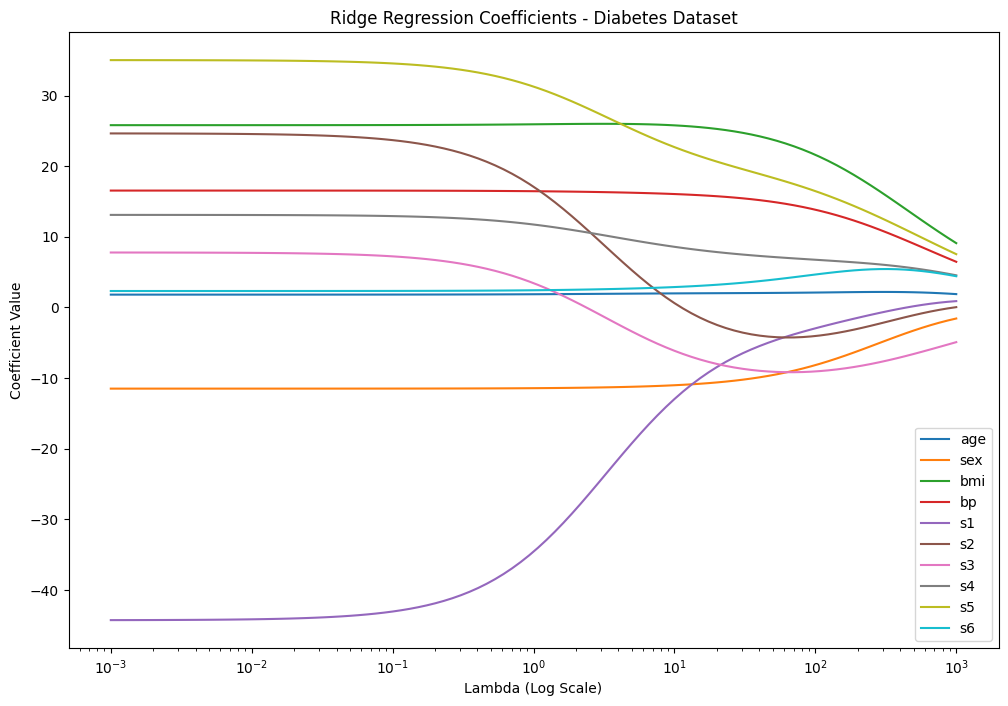

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(X_diabetes.shape[1]):
    plt.plot(lambdas, [coef[i] for coef in ridge_coefs_diabetes], label=f'{diabetes.feature_names[i]}')
plt.xscale('log')
plt.xlabel('Lambda (Log Scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients - Diabetes Dataset')
plt.legend()
plt.show()

In [ ]:
lasso_coefs_diabetes, _ = lasso_regression(X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test, lambdas)

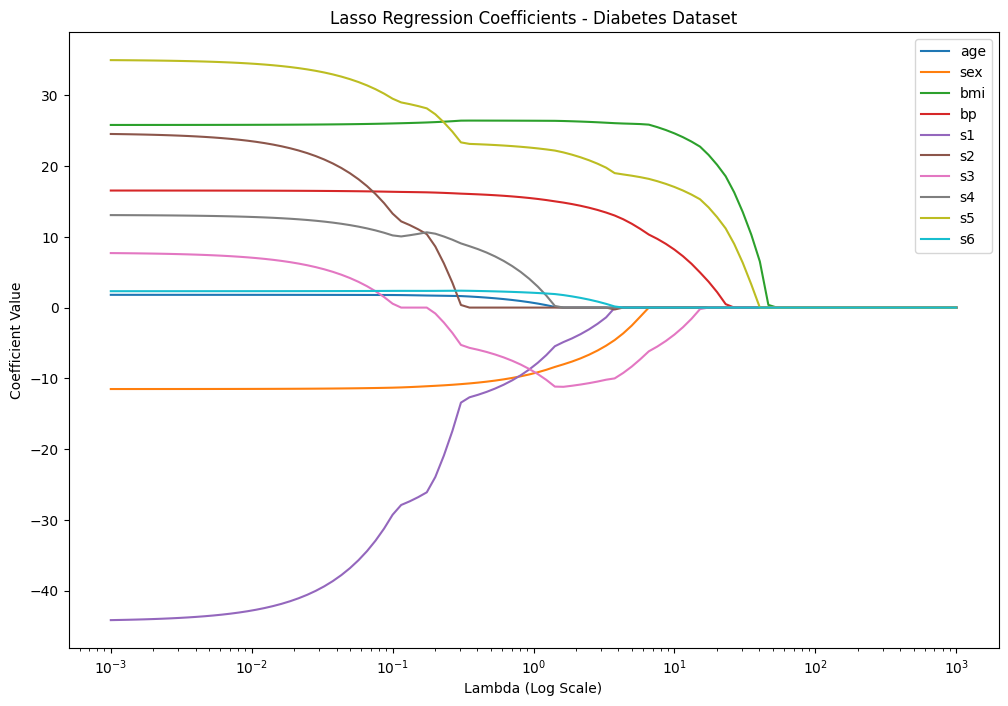

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(X_diabetes.shape[1]):
    plt.plot(lambdas, [coef[i] for coef in lasso_coefs_diabetes], label=f'{diabetes.feature_names[i]}')
plt.xscale('log')
plt.xlabel('Lambda (Log Scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients - Diabetes Dataset')
plt.legend()
plt.show()

In [ ]:
alphas = [0.1, 0.5, 1.0]
l1_ratios = [0.1, 0.5, 0.7, 0.9]

elastic_net_coefs_diabetes,_,elastic_net_results = elastic_net_regression(X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test, alphas, l1_ratios)



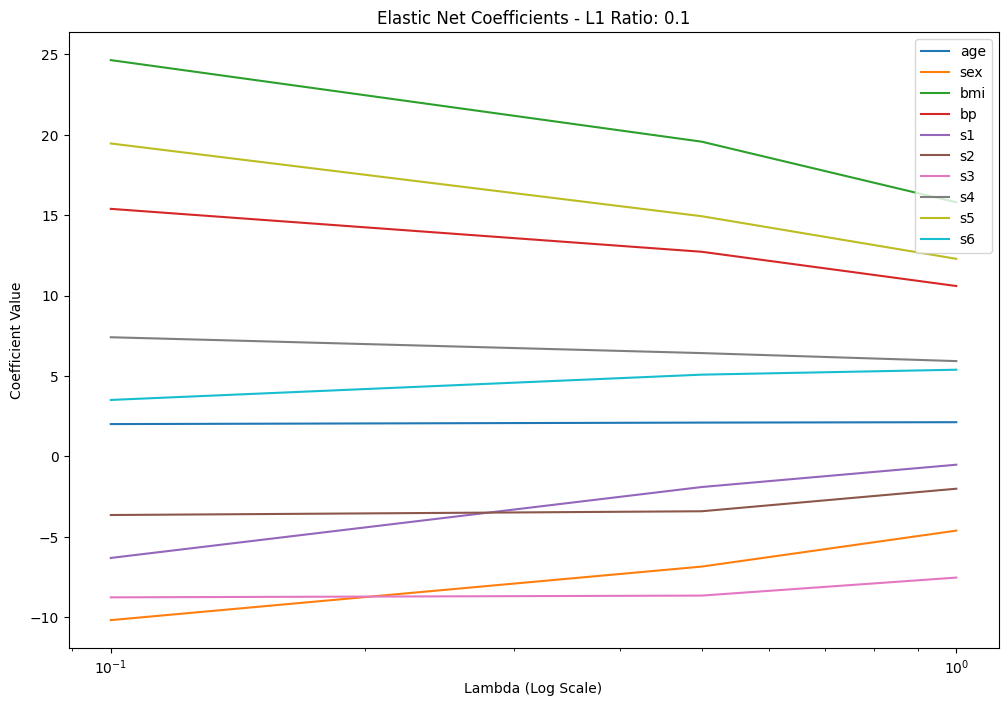

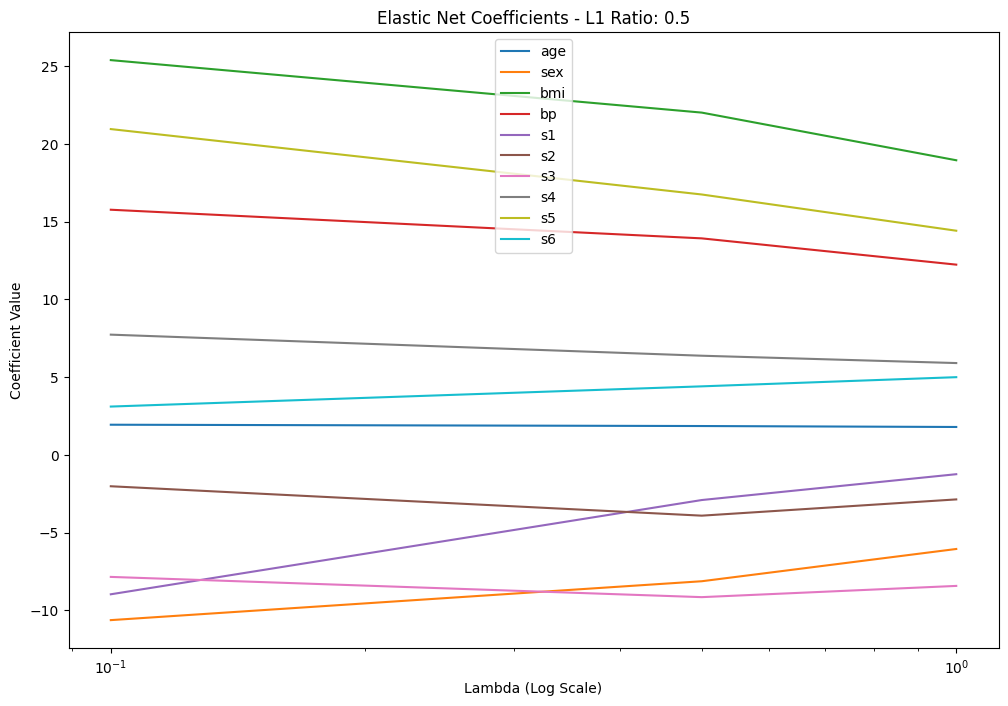

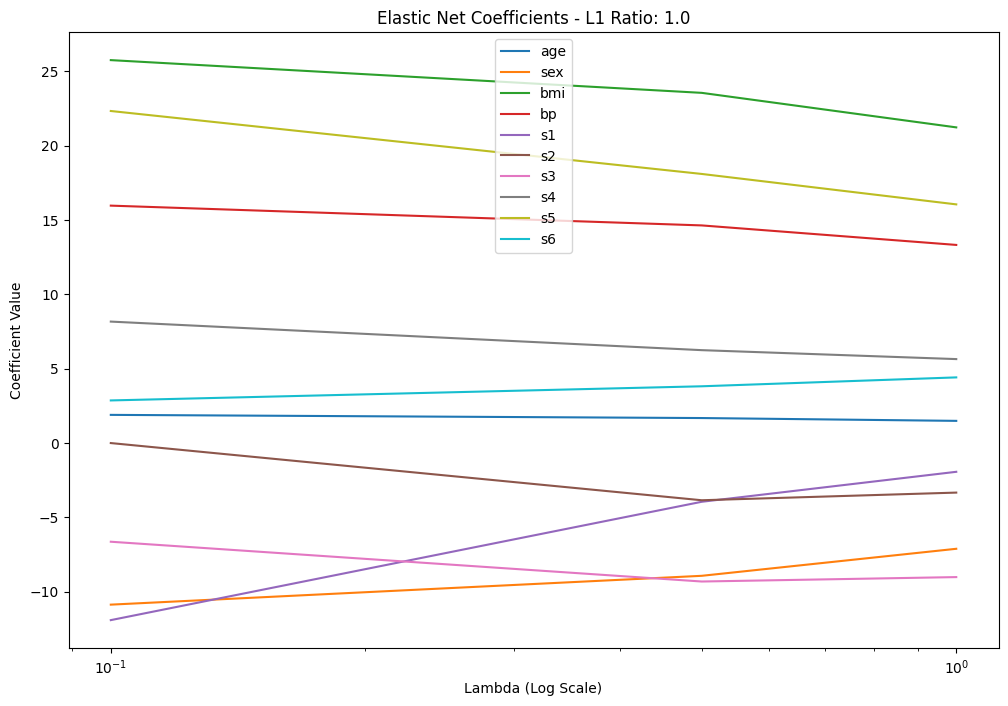

In [ ]:
import matplotlib.pyplot as plt

def plot_elastic_net_coefficients(alphas, coefs, feature_names, title):
    plt.figure(figsize=(12, 8))
    for i in range(len(feature_names)):
        plt.plot(alphas, [coef[i] for coef in coefs], label=f'{feature_names[i]}')
    plt.xscale('log')
    plt.xlabel('Lambda (Log Scale)')
    plt.ylabel('Coefficient Value')
    plt.title(title)
    plt.legend()
    plt.show()



l1_ratios = [result["l1_ratio"] for result in elastic_net_results]
elastic_net_coefs = [result["coefs"] for result in elastic_net_results]

plot_elastic_net_coefficients(alphas, elastic_net_coefs[0], diabetes.feature_names, 'Elastic Net Coefficients - L1 Ratio: 0.1')
plot_elastic_net_coefficients(alphas, elastic_net_coefs[1], diabetes.feature_names, 'Elastic Net Coefficients - L1 Ratio: 0.5')
plot_elastic_net_coefficients(alphas, elastic_net_coefs[2], diabetes.feature_names, 'Elastic Net Coefficients - L1 Ratio: 1.0')



### Applying Ridge and Lasso on Boston Dataset

In [ ]:
ridge_coefs_boston, _ = ridge_regression(X_boston_train, X_boston_test, y_boston_train, y_boston_test, lambdas)

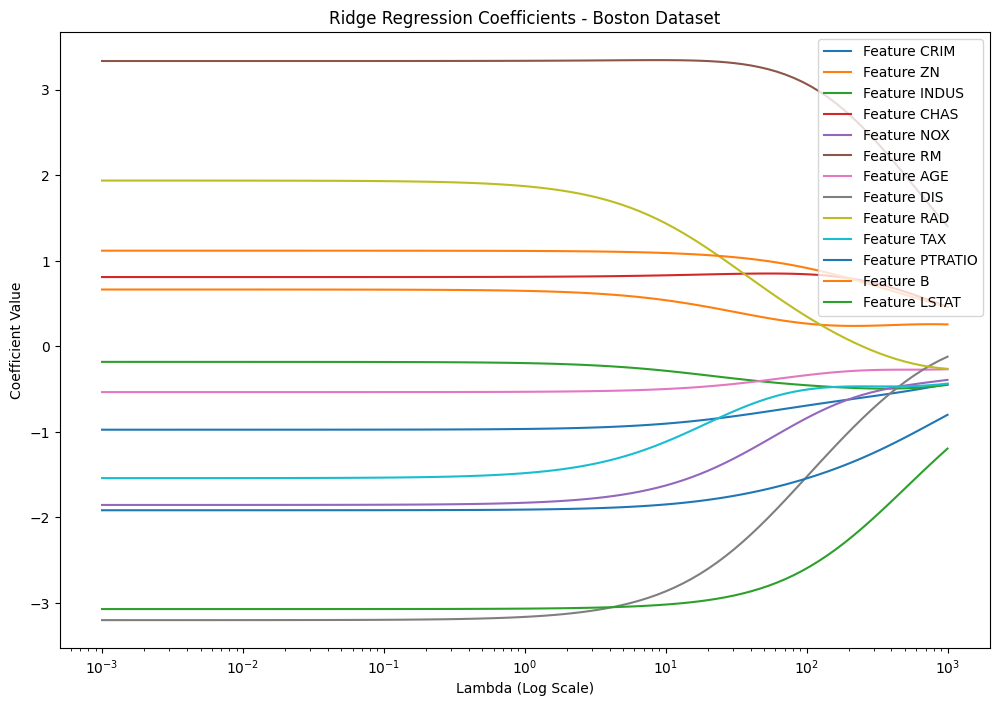

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(X_boston.shape[1]):
    plt.plot(lambdas, [coef[i] for coef in ridge_coefs_boston], label=f'Feature {boston.columns[i]}')
plt.xscale('log')
plt.xlabel('Lambda (Log Scale)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients - Boston Dataset')
plt.legend()
plt.show()

In [ ]:
lasso_coefs_boston, _ = lasso_regression(X_boston_train, X_boston_test, y_boston_train, y_boston_test, lambdas)

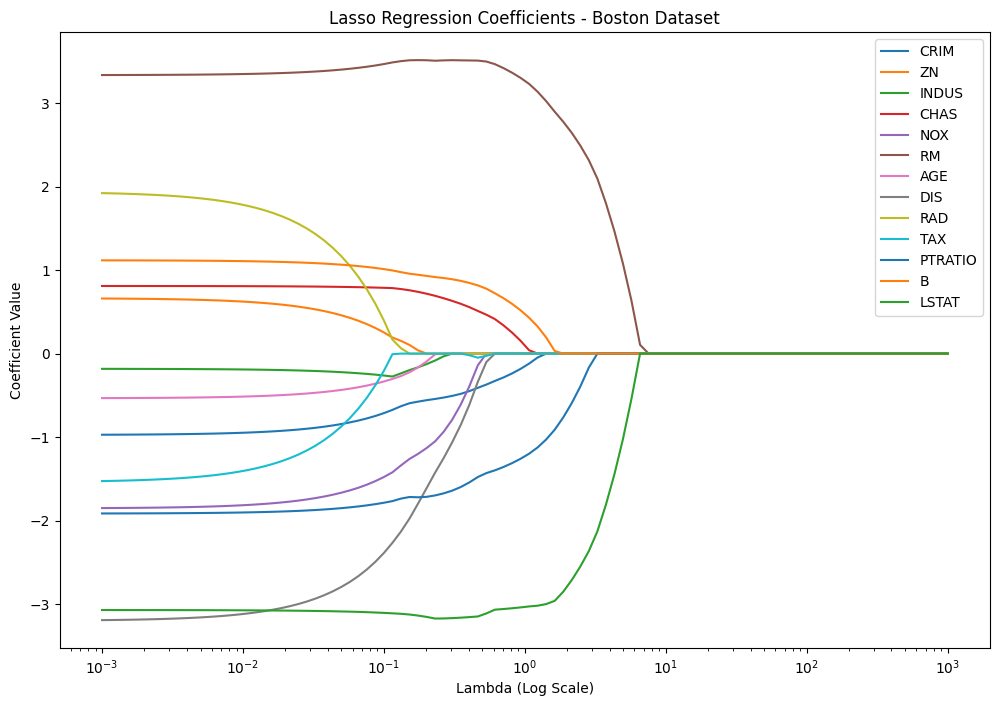

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(X_boston.shape[1]):
    plt.plot(lambdas, [coef[i] for coef in lasso_coefs_boston], label=f'{boston.columns[i]}')

plt.xscale('log')
plt.xlabel('Lambda (Log Scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients - Boston Dataset')
plt.legend()
plt.show()

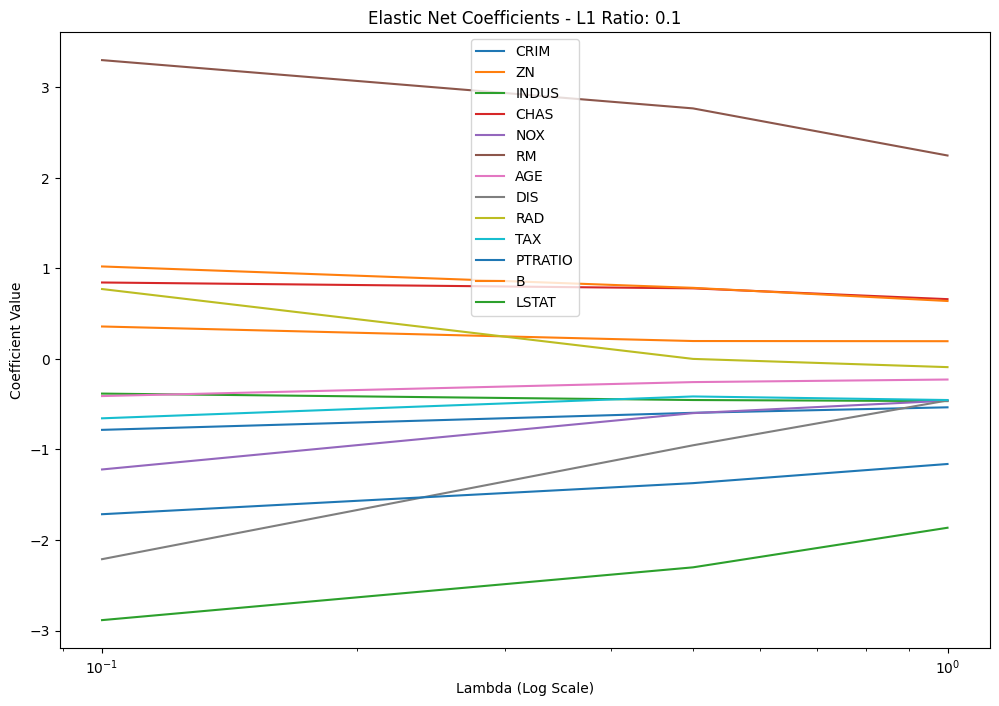

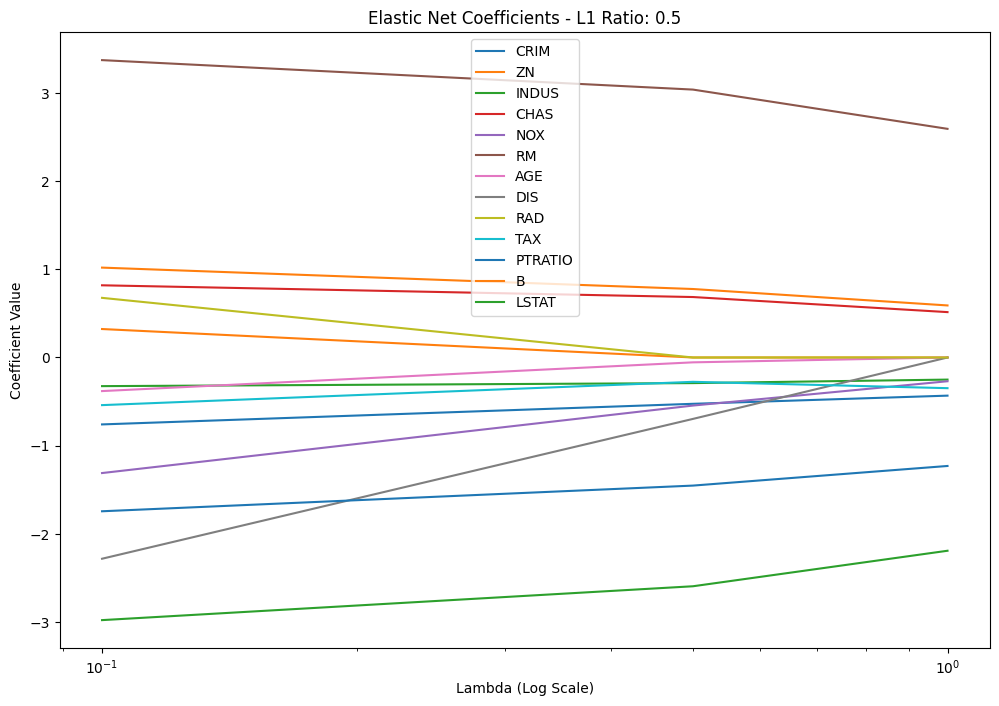

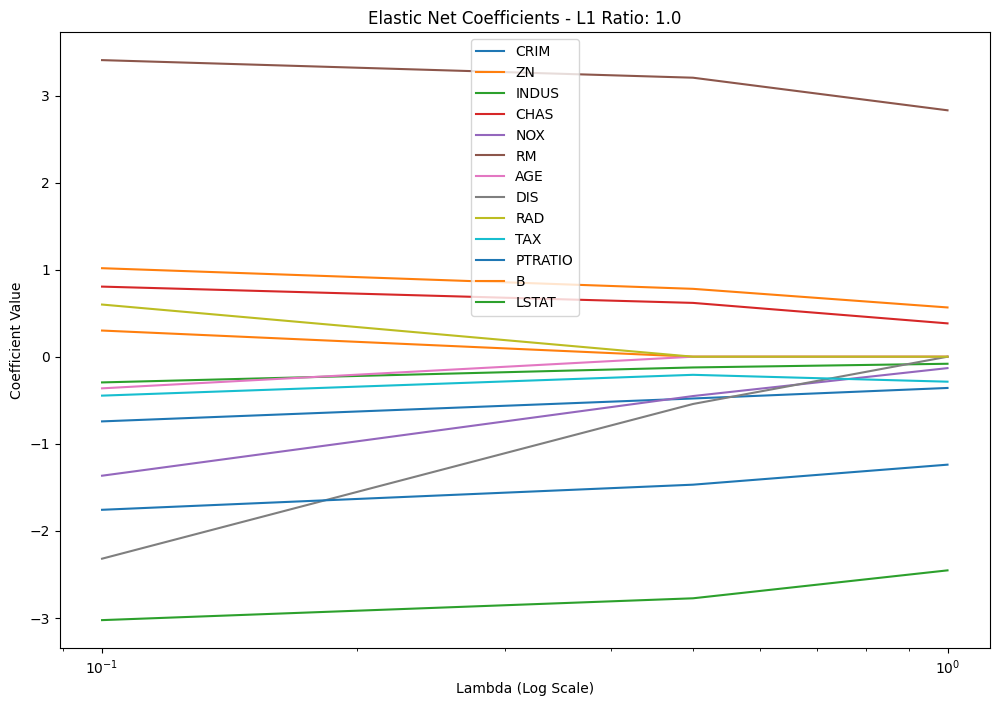

In [ ]:
alphas = [0.1, 0.5, 1.0]
l1_ratios = [0.1, 0.5, 0.7, 0.9]

elastic_net_coefs_boston,_,elastic_net_results = elastic_net_regression(X_boston_train, X_boston_test, y_boston_train, y_boston_test, alphas, l1_ratios)

import matplotlib.pyplot as plt

def plot_elastic_net_coefficients(alphas, coefs, feature_names, title):
    plt.figure(figsize=(12, 8))
    for i in range(len(feature_names)):
        plt.plot(alphas, [coef[i] for coef in coefs], label=f'{feature_names[i]}')
    plt.xscale('log')
    plt.xlabel('Lambda (Log Scale)')
    plt.ylabel('Coefficient Value')
    plt.title(title)
    plt.legend()
    plt.show()



l1_ratios = [result["l1_ratio"] for result in elastic_net_results]
elastic_net_coefs = [result["coefs"] for result in elastic_net_results]

column_names = boston.columns.tolist()
column_names.pop()



plot_elastic_net_coefficients(alphas, elastic_net_coefs[0], column_names, 'Elastic Net Coefficients - L1 Ratio: 0.1')
plot_elastic_net_coefficients(alphas, elastic_net_coefs[1], column_names, 'Elastic Net Coefficients - L1 Ratio: 0.5')
plot_elastic_net_coefficients(alphas, elastic_net_coefs[2], column_names, 'Elastic Net Coefficients - L1 Ratio: 1.0')

